# **Data Analysis Exercise** - Smoking Habits
### Author: Gregorio Mendoza Serrano 

# Introduction

In this exercise, we will examine a dataset containing biometric and health information to determine the presence or absence of smoking habits in individuals based on bio-health signals. The `smoking.csv` file we will use includes various features such as age, weight, height, fasting glucose levels, and cholesterol, among others.

This analysis will allow us to apply and delve deeper into Machine Learning techniques such as SVM and kNN, as well as feature engineering methods, which are essential for preparing and optimizing data for modeling. We will address the transformation of numerical and categorical variables and explore how these processes affect the performance of predictive models.

We will begin with an exploration of the data to understand its structure and the relationships between the different variables. Subsequently, we will prepare the data for analysis, applying preprocessing techniques and generating new features that will help us capture the complexity of the dataset and improve the accuracy of our predictive models.

## The Dataset

The dataset we will work with includes a series of attributes related to health and biometric measurements. Here is a description of each attribute and its possible association with the smoking habit:

* **ID**: Unique identifier for each individual in the dataset. It has no direct association with the smoking habit.
* **Gender**: Gender of the individual, which may have variations in the prevalence of the smoking habit.
* **Age**: Age of the individual, presented in 5-year intervals. The prevalence of the smoking habit often decreases with age.
* **Height**: Height in centimeters. It has no direct association with the smoking habit.
* **Weight**: Weight in kilograms. Smoking can influence weight and varies individually.
* **Waist**: Waist circumference in centimeters. Smoking can affect body fat distribution.
* **Eyesight (Left/Right)**: Measurement of visual acuity for the left/right eye. It has no direct association with the smoking habit.
* **Hearing (Left/Right)**: Measurement of hearing for the left/right ear. It has no direct association with the smoking habit.
* **Systolic BP**: Systolic blood pressure. Smoking can affect blood pressure.
* **Diastolic BP**: Diastolic blood pressure. Smoking can affect blood pressure.
* **Fasting Blood Sugar**: Fasting blood sugar level. Smoking can impact blood sugar levels.
* **Cholesterol (Total)**: Total cholesterol level. Smoking can influence cholesterol levels.
* **Triglyceride**: Triglyceride level. Smoking can influence triglyceride levels.
* **HDL Cholesterol**: HDL cholesterol level. Smoking can decrease HDL cholesterol levels.
* **LDL Cholesterol**: LDL cholesterol level. Smoking can influence LDL cholesterol levels.
* **Hemoglobin**: Hemoglobin level. It has no direct association with the smoking habit.
* **Urine Protein**: Presence of protein in urine. Smoking can impact renal function.
* **Serum Creatinine**: Serum creatinine level. Smoking can impact renal function.
* **AST/ALT**: Levels of aspartate aminotransferase and alanine aminotransferase. Smoking can impact liver function.
* **GTP**: Level of γ-GTP. Smoking can impact liver enzyme levels.
* **Oral Exam Status**: Status of the oral exam. Smoking can impact oral health.
* **Dental Caries**: Presence of dental caries. Smoking can affect dental health.
* **Tartar Status**: Status of tartar. Smoking can affect dental health.
* **Blood Group**: Blood group of the individual.
* **Smoking Status**: Indicates whether the individual is a smoker or not. This is the target variable that directly indicates the smoking habit.

It is important to understand these associations, as they will help us determine which features may be more relevant for our predictive models and how we might need to transform them to improve the accuracy of our predictions.



---

# 0. Import of Libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV

import plotly.express as px

%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score, confusion_matrix, roc_curve, auc
from sklearn.svm import SVC

from scipy import stats



---

# Initial Data Exploration

**Exercise 1** - Declare the size of the dataset. With respect to the columns, identify which variables are numerical and which are categorical. Who is the lightest individual? And the tallest? Draw a histogram of men and women based on whether they smoke or not.

First, we import the dataset and obtain the required details as outlined in the exercise:

In [ ]:
df = pd.read_csv('habitos_fumadores.csv')

# Borramos filas con valores NaN y los duplicados:
df = df.dropna()
df = df.drop_duplicates()


# Encontrar el individuo menos pesado
indice_menos_pesado = df['weight(kg)'].idxmin()
ID_menos_pesado = df['ID'].loc[indice_menos_pesado]
peso_menos_pesado = df['weight(kg)'].loc[indice_menos_pesado]

# Encontrar el individuo más alto
indice_mas_alto = df['height(cm)'].idxmax()
ID_mas_alto = df['ID'].loc[indice_mas_alto]
altura_mas_alto = df['height(cm)'].loc[indice_mas_alto]

# Imprimir los resultados
print(f'Individuo menos pesado: ID: {ID_menos_pesado:.4f}, Peso (Kg): {peso_menos_pesado:.4f}')
print(f'Individuo más alto: ID: {ID_mas_alto:.4f}, Peso (Kg): {altura_mas_alto:.4f}')
print('\n')

# Imprimimos vision general del head
df.head()

Individuo menos pesado: ID: 8763.0000, Peso (Kg): 30.0000
Individuo más alto: ID: 68.0000, Peso (Kg): 190.0000




,ID,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),...,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar,smoking,blood_group
0,0,F,40,155,60,81.3,1.2,1.0,1.0,1.0,...,1.0,0.7,18.0,19.0,27.0,Y,0,Y,0,A+
1,1,F,40,160,60,81.0,0.8,0.6,1.0,1.0,...,1.0,0.6,22.0,19.0,18.0,Y,0,Y,0,A-
2,2,M,55,170,60,80.0,0.8,0.8,1.0,1.0,...,1.0,1.0,21.0,16.0,22.0,Y,0,N,1,0+
3,3,M,40,165,70,88.0,1.5,1.5,1.0,1.0,...,1.0,1.0,19.0,26.0,18.0,Y,0,Y,0,A+
4,4,F,40,155,60,86.0,1.0,1.0,1.0,1.0,...,1.0,0.6,16.0,14.0,22.0,Y,0,N,0,A-


Next, we manually establish the separation of variables into categorical and numerical:

In [ ]:
# Separamos entre variables categóricas y numéricas:

numeric_var = ['age', 'height(cm)', 'weight(kg)', 'waist(cm)', 'eyesight(left)',
       'eyesight(right)', 'hearing(left)', 'hearing(right)', 'systolic',
       'relaxation', 'fasting blood sugar', 'Cholesterol', 'triglyceride',
       'HDL', 'LDL', 'hemoglobin', 'serum creatinine', 'AST',
       'ALT', 'Gtp']

categorical_var = ['ID', 'gender', 'oral', 'tartar', 'blood_group',
                   'Urine protein', 'dental caries']

# Imprimir los resultados de la separación:
print("\nVariables numéricas:")
print(numeric_var)

print("\nVariables categóricas:")
print(categorical_var)

print("\n")


Variables numéricas:
['age', 'height(cm)', 'weight(kg)', 'waist(cm)', 'eyesight(left)', 'eyesight(right)', 'hearing(left)', 'hearing(right)', 'systolic', 'relaxation', 'fasting blood sugar', 'Cholesterol', 'triglyceride', 'HDL', 'LDL', 'hemoglobin', 'serum creatinine', 'AST', 'ALT', 'Gtp']

Variables categóricas:
['ID', 'gender', 'oral', 'tartar', 'blood_group', 'Urine protein', 'dental caries']




Let's generate histograms of male and female smokers and non-smokers, as well as provide some relevant quantitative data regarding differences in the smoker/non-smoker target in the dataset and gender data in the dataset.

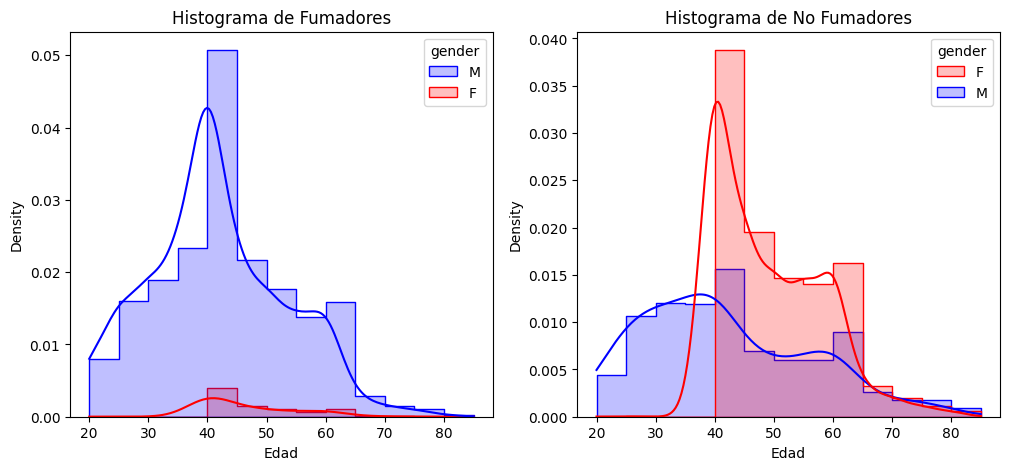




El número de hombres con age=40 y smoking=1 es: 5187
El número de hombres con age=40 y smoking=0 es: 2757
El número de mujeres con age=40 y smoking=1 es: 406
El número de mujeres con age=40 y smoking=0 es: 6831
El número de mujeres con age=40 es: 7237
El número de hombres con age=40 es: 7944
El número de hombres fumadores es: 19596
El número de mujeres fumadoras es: 859
El número de hombres es: 35401
El número de mujeres es: 20291
El número total de fumadores es: 20455
El número total de no fumadores es: 35237


In [ ]:
# Filtrar hombres y mujeres
hombres = df[df['gender'] == 'M']
mujeres = df[df['gender'] == 'F']

hombres_f = hombres[hombres['smoking'] == 1]
mujeres_f = mujeres[mujeres['smoking'] == 1]

fumadores = df[df['smoking'] == 1]
no_fumadores = df[df['smoking'] == 0]

# Create a figure with two subplots side by side
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# Utilizamos histplot para trazar histogramas superpuestos con base en 'OUTPUT'

colors = {'M': 'blue', 'F': 'red'}

sns.histplot(data=fumadores, x='age', hue='gender', palette=colors,
             stat='density', element="step", binwidth=5, common_norm=True,
             kde=True, kde_kws={"bw_adjust":1.75}, ax=axes[0])
axes[0].set_title('Histograma de Fumadores')
axes[0].set_xlabel('Edad')

sns.histplot(data=no_fumadores, x='age', hue='gender', palette=colors,
             element="step", binwidth=5, common_norm=True, stat='density',
             kde=True, kde_kws={"bw_adjust":2.0}, ax=axes[1])
axes[1].set_title('Histograma de No Fumadores')
axes[1].set_xlabel('Edad')

print("\n")
plt.show()
print("\n")

conteo = fumadores.query('age == 40 and gender =="M"').shape[0]
print(f"\nEl número de hombres con age=40 y smoking=1 es: {conteo}")

conteo = no_fumadores.query('age == 40 and gender =="M"').shape[0]
print(f"El número de hombres con age=40 y smoking=0 es: {conteo}")

conteo = fumadores.query('age == 40 and gender =="F"').shape[0]
print(f"El número de mujeres con age=40 y smoking=1 es: {conteo}")

conteo = no_fumadores.query('age == 40 and gender =="F"').shape[0]
print(f"El número de mujeres con age=40 y smoking=0 es: {conteo}")

conteo = mujeres.query('age == 40').shape[0]
print(f"El número de mujeres con age=40 es: {conteo}")

conteo = hombres.query('age == 40').shape[0]
print(f"El número de hombres con age=40 es: {conteo}")

conteo = fumadores.query('gender =="M"').shape[0]
print(f"El número de hombres fumadores es: {conteo}")

conteo = fumadores.query('gender =="F"').shape[0]
print(f"El número de mujeres fumadoras es: {conteo}")

conteo = df.query('gender =="M"').shape[0]
print(f"El número de hombres es: {conteo}")

conteo = df.query('gender =="F"').shape[0]
print(f"El número de mujeres es: {conteo}")

conteo = df.query('smoking == 1').shape[0]
print(f"El número total de fumadores es: {conteo}")

conteo = df.query('smoking == 0').shape[0]
print(f"El número total de no fumadores es: {conteo}")


Both histograms (and the counts at the bottom) reveal an imbalance in the data for our dependent variable (there are many more non-smokers than smokers) as well as a potential imbalance in the data for female smokers and non-smokers (there are very few female smokers compared to non-smokers, who are an overwhelming majority in the dataset).

The difference between the number of female smokers and non-smokers could be an imbalance introduced during the sample collection among individuals, but this is only intuitive and would need to be supported by new samplings—i.e., it could be perfectly plausible that there are proportionally very few female smokers, contradicting our initial intuition.

Let's provide a description of all the variables to aid in the understanding of subsequent sections:

In [ ]:
df.describe()

,ID,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
count,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,...,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000
mean,27845.500000,44.182917,164.649321,65.864936,82.046418,1.012623,1.007443,1.025587,1.026144,121.494218,...,57.290347,114.964501,14.622592,1.087212,0.885738,26.182935,27.036037,39.952201,0.213334,0.367288
std,16077.039933,12.071418,9.194597,12.820306,9.274223,0.486873,0.485964,0.157902,0.159564,13.675989,...,14.738963,40.926476,1.564498,0.404882,0.221524,19.355460,30.947853,50.290539,0.409665,0.482070
min,0.000000,20.000000,130.000000,30.000000,51.000000,0.100000,0.100000,1.000000,1.000000,71.000000,...,4.000000,1.000000,4.900000,1.000000,0.100000,6.000000,1.000000,1.000000,0.000000,0.000000
25%,13922.750000,40.000000,160.000000,55.000000,76.000000,0.800000,0.800000,1.000000,1.000000,112.000000,...,47.000000,92.000000,13.600000,1.000000,0.800000,19.000000,15.000000,17.000000,0.000000,0.000000
50%,27845.500000,40.000000,165.000000,65.000000,82.000000,1.000000,1.000000,1.000000,1.000000,120.000000,...,55.000000,113.000000,14.800000,1.000000,0.900000,23.000000,21.000000,25.000000,0.000000,0.000000
75%,41768.250000,55.000000,170.000000,75.000000,88.000000,1.200000,1.200000,1.000000,1.000000,130.000000,...,66.000000,136.000000,15.800000,1.000000,1.000000,28.000000,31.000000,43.000000,0.000000,1.000000
max,55691.000000,85.000000,190.000000,135.000000,129.000000,9.900000,9.900000,2.000000,2.000000,240.000000,...,618.000000,1860.000000,21.100000,6.000000,11.600000,1311.000000,2914.000000,999.000000,1.000000,1.000000


Let's replace character-type data with numerical data, and remove the 'oral' column, which contains the same value 'Y' for all records.

In [ ]:
df['gender'].replace({'M': 0, 'F': 1}, inplace=True)
df['tartar'].replace({'N': 0, 'Y': 1}, inplace=True)

# Eliminamos la columna 'oral' utilizando drop:
df = df.drop('oral', axis=1)



---

**Exercise 2** - For the continuous variable "age," apply binarization by thresholding, using the mean of the ages as the threshold. Include this variable in the DataFrame as "age_bin." Perform a count of the two resulting categories in the binarized variable. For the continuous variable "Cholesterol," apply grouping by quantiles using percentiles. Include this variable in the DataFrame as "Cholesterol_per."

In [ ]:
# Binarización por umbralización de la columna "age"
umbral_edades = df['age'].mean()
df['age_bin'] = df['age'].apply(lambda x: 1 if x > umbral_edades else 0)

# Conteo de las categorías resultantes
conteo_age_bin = df['age_bin'].value_counts()

# Agrupación por cuantiles de la columna "Cholesterol"
df['Cholesterol_per'] = pd.qcut(df['Cholesterol'], q=[0, 0.25, 0.5, 0.75, 1], labels=False)

# Mostrar el DataFrame resultante
print("DataFrame con las nuevas variables:")
print(df)

# Valor del umbral de edades:
print("\nUmbral de edad de las categorías en 'age_bin':")
print(umbral_edades.round(2))

# Mostrar el conteo de las categorías en la variable binarizada
print("\nConteo de las categorías en 'age_bin':")
print(conteo_age_bin)

DataFrame con las nuevas variables:
          ID  gender  age  height(cm)  weight(kg)  waist(cm)  eyesight(left)  \
0          0       1   40         155          60       81.3             1.2   
1          1       1   40         160          60       81.0             0.8   
2          2       0   55         170          60       80.0             0.8   
3          3       0   40         165          70       88.0             1.5   
4          4       1   40         155          60       86.0             1.0   
...      ...     ...  ...         ...         ...        ...             ...   
55687  55676       1   40         170          65       75.0             0.9   
55688  55681       1   45         160          50       70.0             1.2   
55689  55683       1   55         160          50       68.5             1.0   
55690  55684       0   60         165          60       78.0             0.8   
55691  55691       0   55         160          65       85.0             0.9   

   



---

---

**Exercise 3** - For the continuous variable "fasting blood sugar," apply min-max scaling. Draw a histogram of the original variable and another histogram of the variable after scaling. What conclusions can you draw from comparing both histograms?

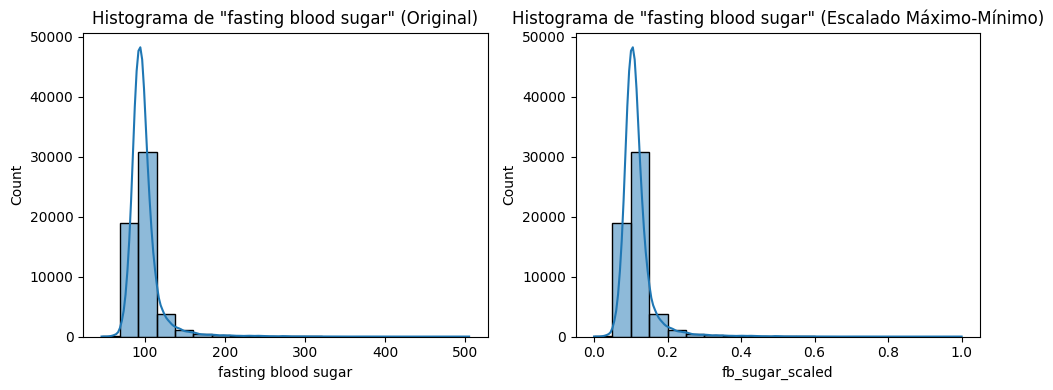

In [ ]:
# Extraer la columna 'fasting blood sugar' para el escalado
fb_sugar = df['fasting blood sugar'].values.reshape(-1, 1)

# Inicializar el escalador máximo-mínimo
scaler = MinMaxScaler()

# Aplicar el escalado máximo-mínimo
fb_sugar_scaled = scaler.fit_transform(fb_sugar)

# Agregar la variable escalada al DataFrame
df['fb_sugar_scaled'] = fb_sugar_scaled

# Configurar la figura con dos subplots para comparar los histogramas
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

# Histograma de la variable original
sns.histplot(df['fasting blood sugar'], bins=20, kde=True, ax=axes[0])
axes[0].set_title('Histograma de "fasting blood sugar" (Original)')

# Histograma de la variable después del escalado máximo-mínimo
sns.histplot(df['fb_sugar_scaled'], bins=20, kde=True, ax=axes[1])
axes[1].set_title('Histograma de "fasting blood sugar" (Escalado Máximo-Mínimo)')

# Ajustar el diseño
plt.tight_layout()
plt.show()

The histograms we obtain are both strongly skewed to the left. From a blood sugar level of approximately 200, we can assume that the values found will be outliers that are not representative of this study—in cases of hyperglycemia, there is an impact on other health indicators that would affect the predictive capacity of the algorithm in this exercise.

Therefore, we will remove individuals with a blood sugar level of 150 from the sample to further centralize the sample.

In [ ]:
df = df[df['fasting blood sugar'] <= 150]

Let's regenerate both histograms for verification:

<ipython-input-10-0daa21bc3219>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['fb_sugar_scaled'] = fb_sugar_scaled


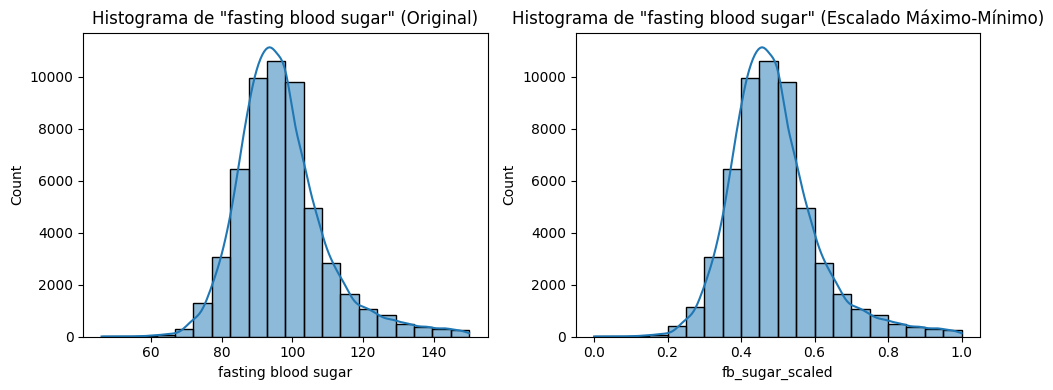

In [ ]:
# Extraer la columna 'fasting blood sugar' para el escalado
fb_sugar = df['fasting blood sugar'].values.reshape(-1, 1)

# Inicializar el escalador máximo-mínimo
scaler = MinMaxScaler()

# Aplicar el escalado máximo-mínimo
fb_sugar_scaled = scaler.fit_transform(fb_sugar)

# Agregar la variable escalada al DataFrame
df['fb_sugar_scaled'] = fb_sugar_scaled

# Configurar la figura con dos subplots para comparar los histogramas
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

# Histograma de la variable original
sns.histplot(df['fasting blood sugar'], bins=20, kde=True, ax=axes[0])
axes[0].set_title('Histograma de "fasting blood sugar" (Original)')

# Histograma de la variable después del escalado máximo-mínimo
sns.histplot(df['fb_sugar_scaled'], bins=20, kde=True, ax=axes[1])
axes[1].set_title('Histograma de "fasting blood sugar" (Escalado Máximo-Mínimo)')

# Ajustar el diseño
plt.tight_layout()
plt.show()

We can see that we have a much more centered distribution of the variable in question.



---

---

**Exercise 4** - Isolate the discrete variable "blood_group" into a dataframe that consists of this single variable. Generate 3 different dataframes:

* One with variables generated using the one-hot encoding method
* Another with variables generated using the dummy coding method
* A final one with variables generated using the effect coding method

Next, we will carry out the required variable generation as outlined in the exercise.

Following that, we will perform an additional transformation and encode the blood groups into a single numerical column to simplify the dataset and reduce its dimensionality.

In [ ]:
# Nuevo DataFrame solo con la columna 'blood_group'
df_blood_group = df[['blood_group']].copy()

# Renombramos grupos sanguineos en 'blood_group'
df_blood_group['blood_group'].replace({'A+': 'Ap', 'A-': 'An', '0+': '0p', 'B+': 'Bp'}, inplace=True)

# Mostrar los valores únicos
unique_values = df_blood_group['blood_group'].unique()
print("\nValores únicos en la columna 'blood_group':")
print(unique_values)

# Mostramos los primeros registros del nuevo DataFrame para verificar
print("\nNuevo DataFrame con 'blood_group' solamente:")
print(df_blood_group.head(4))

# One-hot encoding
df_blood_group_one_hot = pd.get_dummies(df_blood_group).astype(int)

# Dummy coding
df_blood_group_dummy = pd.get_dummies(df_blood_group, drop_first=True).astype(int)

# Realizamos effect coding, siendo codificado el grupo sanguineo 0+ todo -1:
df_blood_group_effect = df_blood_group_one_hot.copy().astype(int)
df_blood_group_effect['blood_group_Ap'] -= df_blood_group_effect['blood_group_0p']
df_blood_group_effect['blood_group_An'] -= df_blood_group_effect['blood_group_0p']
df_blood_group_effect['blood_group_Bp'] -= df_blood_group_effect['blood_group_0p']
df_blood_group_effect.drop(columns=['blood_group_0p'], inplace=True)

# Muestra los primeros registros de cada DataFrame para verificar
print("\nOne-hot encoding DataFrame:")
print(df_blood_group_one_hot.head(4))

print("\nDummy coding DataFrame:")
print(df_blood_group_dummy.head(4))

print("\nEffect coding DataFrame:")
print(df_blood_group_effect.head(4))

# Renombramos grupos sanguineos en el dataframe
df['blood_group'].replace({'A+': 0, 'A-': 1, '0+': 2, 'B+': 3}, inplace=True)


Valores únicos en la columna 'blood_group':
['Ap' 'An' '0p' 'Bp']

Nuevo DataFrame con 'blood_group' solamente:
  blood_group
0          Ap
1          An
2          0p
3          Ap

One-hot encoding DataFrame:
   blood_group_0p  blood_group_An  blood_group_Ap  blood_group_Bp
0               0               0               1               0
1               0               1               0               0
2               1               0               0               0
3               0               0               1               0

Dummy coding DataFrame:
   blood_group_An  blood_group_Ap  blood_group_Bp
0               0               1               0
1               1               0               0
2               0               0               0
3               0               1               0

Effect coding DataFrame:
   blood_group_An  blood_group_Ap  blood_group_Bp
0               0               1               0
1               1               0               0
2      



---

---

# Data Preprocessing

**Exercise 5**: In this section, we will continue preparing our dataset for analysis. Building upon the tasks completed previously:

* **Dataset Splitting**: Segment the data using the scikit-learn library with the reproducible seed "1234", using 80% for the training set and 20% for the testing set. Indicate the size of both sets.
Before dividing the dataset into Train and Test sets, we perform two operations that will aid us in subsequent operations within this study:

Firstly, we change the names of three columns that include parentheses in the field name to avoid formatting issues.

Secondly, we keep only the nine variables that have the highest correlation with the dependent variable ('smoking'). For more details, refer to Exercise 7 where this decision is grounded.

In [ ]:
df_model_copy = df.copy()
df_model_copy.rename(columns={'height(cm)': 'height'}, inplace=True)
df_model_copy.rename(columns={'weight(kg)': 'weight'}, inplace=True)
df_model_copy.rename(columns={'waist(cm)': 'waist'}, inplace=True)
df_model = df_model_copy[['height', 'weight', 'waist',
                          'age', 'hemoglobin', 'HDL', 'gender',
                          'triglyceride', 'Gtp']].copy()

print(df_model.head())

   height  weight  waist  age  hemoglobin   HDL  gender  triglyceride   Gtp
0     155      60   81.3   40        12.9  73.0       1          82.0  27.0
1     160      60   81.0   40        12.7  42.0       1         115.0  18.0
2     170      60   80.0   55        15.8  55.0       0         182.0  22.0
3     165      70   88.0   40        14.7  45.0       0         254.0  18.0
4     155      60   86.0   40        12.5  62.0       1          74.0  22.0


After standarizing part of the variables, let's define the train and test groups: 

In [ ]:
X = df_model
y = df['smoking']

# Segmentamos el conjunto de datos en train y test:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

# Seleccionar solo las columnas que se van a estandarizar
target_columns = ['height', 'weight','waist', 'age', 'hemoglobin', 'HDL', 'triglyceride', 'Gtp']
X_train_subset = X_train[target_columns].values
X_test_subset = X_test[target_columns].values

# Instanciar y ajustar el StandardScaler a X_train_subset
scaler = StandardScaler()
scaler.fit(X_train_subset)

# Transformar solo las columnas seleccionadas en X_train y X_test
X_train_scaled = X_train.copy()
X_train_scaled[target_columns] = scaler.transform(X_train_subset)

X_test_scaled = X_test.copy()
X_test_scaled[target_columns] = scaler.transform(X_test_subset)

print(X_test_scaled)

# Imprimir las medias y desviaciones estándar utilizadas en el escalamiento
print("\nMedias utilizadas en el escalamiento:", scaler.mean_)
print("\nDesviaciones estándar utilizadas en el escalamiento:", scaler.scale_)

# Mostrar el tamaño de ambos conjuntos
print("\nTamaño del conjunto de entrenamiento:", len(X_train_scaled))
print("\nTamaño del conjunto de test:", len(X_test_scaled))

         height    weight     waist       age  hemoglobin       HDL  gender  \
46764 -1.589796 -1.231384 -1.289006 -0.337405   -0.771164  1.407991       1   
4838  -1.589796 -0.056552  0.595857  0.906575   -0.515672  0.790447       1   
7282  -1.589796 -1.231384 -1.169848 -0.337405    0.570171  1.270759       1   
15049 -2.133344 -0.839773 -0.639053 -0.337405   -0.898910  0.653215       1   
11162  1.671491  1.118280  0.552527 -0.752065    1.081156 -0.238792       0   
...         ...       ...       ...       ...         ...       ...     ...   
20950  1.671491  1.901501  1.960759 -0.337405    0.186932 -1.130799       0   
53528  1.127943  0.726669  0.552527 -1.996044    0.889537 -1.130799       0   
51178 -0.502700 -0.448162 -1.278173 -0.337405    0.123059 -0.650487       0   
6812  -1.589796  0.335059  2.394061  0.491915    0.059186 -0.719103       1   
14475  1.671491  1.901501  1.527457 -0.337405    0.506298 -1.679726       0   

       triglyceride       Gtp  
46764     -0.936771



---

---

# Exploratory Data Analysis (EDA)

**Exercise 6**: Conduct a deep dive into the data to extract insights that will inform model construction:

* **Variable Distribution**: For the variable "age", implement a quantile-based binning using deciles. Manually compute the Weight of Evidence (WoE) for each bin. Calculate the Information Value (IV) of the discretized variable against the target. Do you believe this variable is a significant predictor of the target variable (smoking)?

We proceed with the specified binning and manual WoE calculations:

In [ ]:
# Agregar una nueva columna 'deciles_age' al DataFrame
df['deciles_age'] = pd.qcut(df['age'], q=10, labels=False, duplicates='drop')

# Agrupar por 'deciles_age' y calcular WoE para cada grupo manualmente
decile_groups = df.groupby('deciles_age')['age']

# Calcular el conteo total y el conteo para cada categoría (suponiendo 'smoking' como la variable objetivo)
total_count = df['deciles_age'].value_counts().sort_index()
category_count = df.groupby(['deciles_age', 'smoking']).size().unstack(fill_value=0)

# Calcular WoE manualmente y mostrar el resultado
woe_dict = {}
for decile, counts in zip(total_count.index, category_count.values):
    woe = np.log((counts[1] / total_count[decile]) / (counts[0] / (total_count[decile] - counts[1])))
    woe_dict[decile] = woe
    print(f"Decil {decile}: WoE = {woe}")
    print(f"   Valores de 'age': {decile_groups.get_group(decile).values}")

# Mapear los valores de WoE de vuelta al DataFrame original
df['woe'] = df['deciles_age'].map(woe_dict)



Decil 0: WoE = -0.7407885795255039
   Valores de 'age': [30 30 30 ... 25 30 20]
Decil 1: WoE = -0.6338365060163174
   Valores de 'age': [35 35 35 ... 35 35 35]
Decil 2: WoE = -1.0123902373498723
   Valores de 'age': [40 40 40 ... 40 40 40]
Decil 3: WoE = -1.1097691865466637
   Valores de 'age': [45 45 45 ... 45 45 45]
Decil 4: WoE = -1.0867624925391561
   Valores de 'age': [50 50 50 ... 50 50 50]
Decil 5: WoE = -1.2519344680337265
   Valores de 'age': [55 55 55 ... 55 55 55]
Decil 6: WoE = -1.3059128426689306
   Valores de 'age': [60 60 60 ... 60 60 60]
Decil 7: WoE = -1.6539520074864105
   Valores de 'age': [65 80 65 ... 80 65 75]


In the obtained results, the negative WoE values indicate that in that decile, the proportion of smokers is lower than that of non-smokers.
It is also observed that all WoE values are negative, which indicates that our sample is unbalanced, with many more cases of smokers than non-smokers. 

Let's calculate the IV of each decile and the total sum:


In [ ]:
# Calcular IV para cada decil
iv_dict = {}
for decile, counts in zip(total_count.index, category_count.values):
    p_event = counts[1] / total_count[decile]
    p_non_event = counts[0] / (total_count[decile] - counts[1] + 1e-10)  # Adding a small constant to avoid division by zero
    iv = (p_event - p_non_event) * np.log(p_event / (p_non_event + 1e-10))
    iv_dict[decile] = iv

# Sumar los IVs de todos los deciles para obtener el IV total
total_iv = sum(iv_dict.values())

# Mostrar el IV para cada decil y el IV total
for decile, iv in iv_dict.items():
    print(f"Decil {decile}: IV = {iv}")

print(f"\nTotal IV: {total_iv}")

Decil 0: IV = 0.3876266459342819
Decil 1: IV = 0.2975530114394448
Decil 2: IV = 0.6445388021261064
Decil 3: IV = 0.7439503803038271
Decil 4: IV = 0.7201901562320457
Decil 5: IV = 0.8939424320738802
Decil 6: IV = 0.9521082620187105
Decil 7: IV = 1.3375635193335746

Total IV: 5.977473209461871


A value of IV > 0.5 indicates a very high predictive power, which is logical considering the low percentage of smokers in certain age ranges.

* **Relationships between variables**: Perform the same exercise for the variable "Height". Based on the results obtained, which do you think has stronger predictive power?

In [ ]:
# Agregar una nueva columna 'deciles_age' al DataFrame
df['deciles_height'] = pd.qcut(df['height(cm)'], q=10, labels=False, duplicates='drop')

# Agrupar por 'deciles_age' y calcular WoE para cada grupo manualmente
decile_groups = df.groupby('deciles_height')['height(cm)']

# Calcular el conteo total y el conteo para cada categoría (suponiendo 'smoking' como la variable objetivo)
total_count = df['deciles_height'].value_counts().sort_index()
category_count = df.groupby(['deciles_height', 'smoking']).size().unstack(fill_value=0)

# Calcular WoE manualmente y mostrar el resultado
woe_dict = {}
for decile, counts in zip(total_count.index, category_count.values):
    woe = np.log((counts[1] / total_count[decile]) / (counts[0] / (total_count[decile] - counts[1])))
    woe_dict[decile] = woe
    print(f"Decil {decile}: WoE = {woe}")
    print(f"   Valores de 'age': {decile_groups.get_group(decile).values}")

# Mapear los valores de WoE de vuelta al DataFrame original
df['woe'] = df['deciles_age'].map(woe_dict)

Decil 0: WoE = -3.271408170319367
   Valores de 'age': [150 150 140 ... 150 150 150]
Decil 1: WoE = -2.43960501726596
   Valores de 'age': [155 155 155 ... 155 155 155]
Decil 2: WoE = -1.510192918057237
   Valores de 'age': [160 160 160 ... 160 160 160]
Decil 3: WoE = -0.7917803125392814
   Valores de 'age': [165 165 165 ... 165 165 165]
Decil 4: WoE = -0.6078677708398657
   Valores de 'age': [170 170 170 ... 170 170 170]
Decil 5: WoE = -0.565927180567962
   Valores de 'age': [175 175 175 ... 175 175 175]
Decil 6: WoE = -0.5976932434177588
   Valores de 'age': [180 180 180 ... 185 180 180]


In the result obtained, negative WoE values indicate that in that decile, the proportion of smokers is lower than that of non-smokers. 
It is also observed that all WoE values are negative, which indicates that our sample is not balanced, with far more smokers than non-smokers.

In [ ]:
# Calcular IV para cada decil
iv_dict = {}
for decile, counts in zip(total_count.index, category_count.values):
    p_event = counts[1] / total_count[decile]
    p_non_event = counts[0] / (total_count[decile] - counts[1] + 1e-10)  # Adding a small constant to avoid division by zero
    iv = (p_event - p_non_event) * np.log(p_event / (p_non_event + 1e-10))
    iv_dict[decile] = iv

# Sumar los IVs de todos los deciles para obtener el IV total
total_iv = sum(iv_dict.values())

# Mostrar el IV para cada decil y el IV total
for decile, iv in iv_dict.items():
    print(f"Decil {decile}: IV = {iv}")

print(f"\nTotal IV: {total_iv}")

Decil 0: IV = 3.147248595344127
Decil 1: IV = 2.226882961873647
Decil 2: IV = 1.1766405883674993
Decil 3: IV = 0.43307411667889306
Decil 4: IV = 0.27687729364313723
Decil 5: IV = 0.2445748150484779
Decil 6: IV = 0.26891469865170825

Total IV: 7.77421306960749


A value of IV > 0.5 indicates a very high predictive power, even stronger than that of 'age', which is logical considering:
1. The low smoking rate in younger age groups (and therefore shorter height).
2. Women's height data is generally lower than men's (there is a correlation between height and gender), and since there are very few female smokers in the dataset, this further strengthens the correlation between height and smoker/non-smoker status.



---

---

# Feature Selection

**Exercise 7**: Evaluate and select the most informative features for the model:

* **Determining relevant features**: Using the ".corr()" attribute of the pandas DataFrame, list the 3 variables that correlate the most with the target variable. What logical interpretation can you provide for the correlation obtained with respect to these variables?

In [ ]:
corr_df = df.drop(columns=['ID','deciles_height','deciles_age','age_bin','woe','fb_sugar_scaled']).corr()

# Extraemos tres correlaciones más altas obviando la unitaria.
top_correlations_p = corr_df['smoking'].sort_values(ascending=False)[1:7]
top_correlations_n = corr_df['smoking'].sort_values(ascending=True)[0:3]

# Display the result
print("\n Seis mayores contribuciones positivas:")
print(top_correlations_p)
print("\n Tres mayores contribuciones negativas:")
print(top_correlations_n)


 Seis mayores contribuciones positivas:
hemoglobin      0.399804
height(cm)      0.396123
weight(kg)      0.303644
triglyceride    0.249910
Gtp             0.237840
waist(cm)       0.226511
Name: smoking, dtype: float64

 Tres mayores contribuciones negativas:
gender   -0.509039
HDL      -0.177508
age      -0.167146
Name: smoking, dtype: float64


Based on the previous results (extended to obtain more features with a positive contribution due to their higher correlation), we find that the three variables with the highest correlation are (in descending order):

- gender
- hemoglobin
- height (cm)

In the case of gender, we have previously observed the significant difference in the number of male and female smokers, making this the most determining correlation factor.

For hemoglobin (blood hemoglobin level), the strong correlation is due to the impact of nicotine on smokers, as the presence of carbon monoxide in the blood and other cardiovascular system deteriorating factors contribute to this.

For height (cm), height serves as an indicator of age, and on average, men are taller than women, which leads to a strong correlation with the target variable.

Next, we produce a heatmap of the confusion matrix using plotly to gain further insights into the existing correlations and their logical interpretation:

In [ ]:
fig = px.imshow(df.drop(columns=['ID','deciles_height','deciles_age','age_bin','woe','fb_sugar_scaled']).corr(), color_continuous_scale='Viridis', labels=dict(color='Correlación'))
fig.update_layout(title='Matriz de Correlación', width=800, height=700)
fig.show()

When selecting features to include in the training and test groups, it's preferable to choose more than just the three previously mentioned, as they alone are not representative of an individual's overall health.

Some examples are as follows:
- 'Weight' and 'Waist' are necessary to get an idea of the individual's fitness level, as this is more closely related to the weight/height ratio and waist measurement.
- Other indicators, such as 'Triglyceride' and 'Gtp', were chosen purely based on their correlation value with the target variable.



---

---

# Model Construction

**Exercise 8**: Choose and apply the appropriate classification model.

* **Training**: Train the selected model using the training set with the kNN or SVM algorithm. Justify your choice.

The chosen model for this case is an SVM (Support Vector Machine), as we have an imbalanced sample, and SVMs tend to be more efficient than kNN in such cases.

First, we will perform a scan by varying the hyperparameter **C** exponentially, followed by training and testing to calculate the corresponding **Accuracy** values.

In [ ]:
# Configuramos los arrays para almacenar las precisiones de entrenamiento y prueba
C_values = [0.01, 0.1, 1, 10, 100]
train_accuracy = np.empty(len(C_values))
test_accuracy = np.empty(len(C_values))

for i in range(len(C_values)):

  clf = SVC(kernel='rbf', C=C_values[i], gamma='scale')
  clf.fit(X_train_scaled, y_train)

  # Obtenemos la precisión en el conjunto de entranamiento
  train_accuracy[i] = clf.score(X_train_scaled, y_train)

  # Obtenemos la precisión en el conjunto de test
  test_accuracy[i] = clf.score(X_test_scaled, y_test)

We will plot a simple graph showing the Train and Test Accuracy for the previously tested values of **C**.

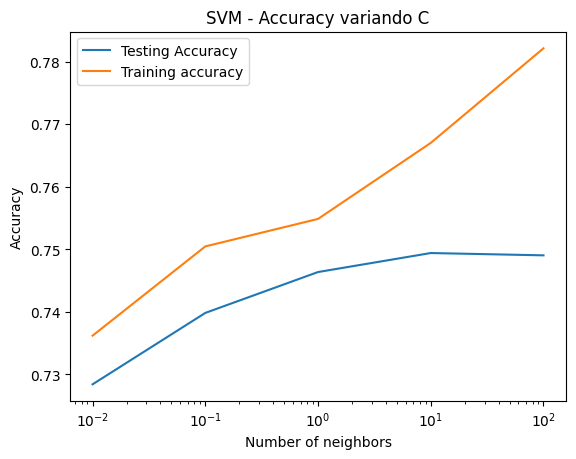

In [ ]:
#Generate plot
plt.title('SVM - Accuracy variando C')
plt.xscale('log')
plt.plot(C_values, test_accuracy, label='Testing Accuracy')
plt.plot(C_values, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

We can see that the values where the Test Accuracy plateaus and does not increase further correspond to **C = 10** and **C = 100**.

In the cross-validation conducted in Exercise 9, it will be concluded that the optimal value for the hyperparameter is **C = 100**. Therefore, we will implement this in our SVM classifier and make predictions on the test values.

In [ ]:
clf = SVC(kernel='rbf', C=100, gamma='scale')
clf.fit(X_train_scaled, y_train)

# Obtenemos la precisión en el conjunto de entranamiento
train_accuracy_final = clf.score(X_train_scaled, y_train)

# Obtenemos la precisión en el conjunto de test
test_accuracy_final = clf.score(X_test_scaled, y_test)

# Hacer predicciones en el conjunto de prueba
y_pred = clf.predict(X_test_scaled)

In [ ]:
print('\ntrain_accuracy SVM C=100')
print(np.round(train_accuracy_final, decimals=3))
print('\ntest_accuracy SVM C=100')
print(np.round(test_accuracy_final, decimals=3))


train_accuracy SVM C=100
0.782

test_accuracy SVM C=100
0.749




---

---

# Model Evaluation

**Exercise 9**: Evaluating the model's performance is key to understanding its effectiveness. This includes:

* **Comparison of Metrics**: Observe and analyze performance metrics discussed in class, such as accuracy, precision, recall, F1-score, AUC-ROC, and confusion matrix. What conclusions can be drawn from each of these metrics?

* **Cross-Validation**: Use cross-validation to optimize hyperparameters and confirm the model's stability. What is the best parameter configuration?

First, we will calculate the performance metrics and the confusion matrix:



Accuracy: 0.7490
Precision: 0.6554
Recall: 0.6933
F1-Score: 0.6738
AUC-ROC: 0.7378


Confusion Matrix:
[[5322 1481]
 [1246 2817]]




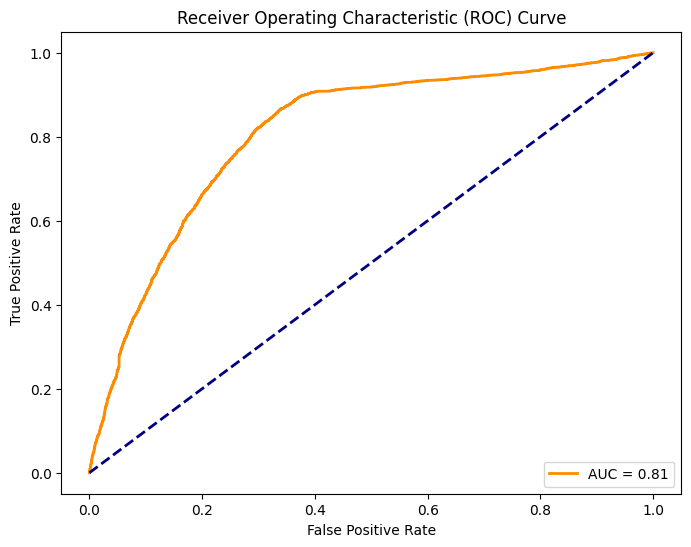

In [ ]:
# Calcular métricas de rendimiento
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Imprimir las métricas
print('\n')
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-Score: {f1:.4f}')
print(f'AUC-ROC: {roc_auc:.4f}')
print('\n')
print('Confusion Matrix:')
print(conf_matrix)
print('\n')

# Curva ROC
fpr, tpr, thresholds = roc_curve(y_test, clf.decision_function(X_test_scaled))
roc_auc_curve = auc(fpr, tpr)

# Graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc_curve:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

**Conclusions:**
- From the confusion matrix and the derived metrics, we can understand the following:
  - We have a recall of 69%, which is lower than the accuracy of 74%. This is not the ideal case, as it is more important to avoid false negatives (detecting a non-smoker when they actually are one) in predictive performance. Therefore, the magnitude of **Precision** is not as relevant in our case.
  - The ideal situation would be the opposite of the previous point: having a recall greater than accuracy, allowing us to be more certain and make more positive errors than negative ones.
  - The F1-Score magnitude is not very relevant in our case, as Precision and Recall have similar values.
- The AUC obtained (74%) indicates that performance is acceptable but has room for improvement.
- The ROC curve, while above the reference line (shown as a dashed blue line representing random performance), is still far from reaching the optimal point (top left corner), suggesting significant room for improvement in model development.

Mejores parámetros: {'C': 100}
Accuracy en conjunto de prueba: 0.7427
AUC-ROC en conjunto de prueba: 0.7331


Mean Accuracy: 0.6951, Std: 0.0042 - {'C': 0.01}
Mean Accuracy: 0.7131, Std: 0.0050 - {'C': 0.1}
Mean Accuracy: 0.7266, Std: 0.0059 - {'C': 1}
Mean Accuracy: 0.7380, Std: 0.0066 - {'C': 10}
Mean Accuracy: 0.7456, Std: 0.0048 - {'C': 100}
Mean Accuracy: 0.7451, Std: 0.0041 - {'C': 1000}




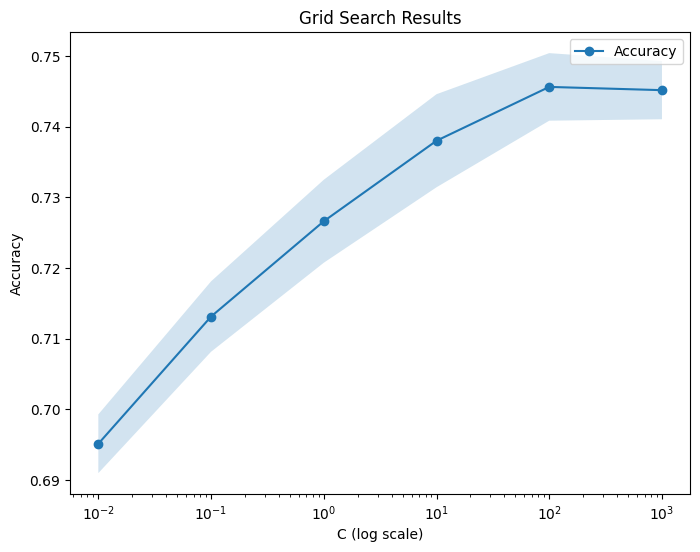

In [ ]:
# Definir los parámetros a ajustar
param_grid = {'C': [0.01, 0.1, 1, 10, 100, 1000]}

# Definir las métricas a utilizar en la optimización
scoring = {'Accuracy': make_scorer(accuracy_score), 'AUC-ROC': make_scorer(roc_auc_score)}

# Realizar la búsqueda de hiperparámetros mediante validación cruzada
grid_search = GridSearchCV(clf, param_grid, scoring=scoring, cv=5, refit='Accuracy')
grid_search.fit(X_train, y_train)

# Obtener los mejores parámetros y modelo
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Hacer predicciones en el conjunto de prueba
y_pred = best_model.predict(X_test)

# Calcular métricas de rendimiento en el conjunto de prueba
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

# Imprimir resultados
print(f'Mejores parámetros: {best_params}')
print(f'Accuracy en conjunto de prueba: {accuracy:.4f}')
print(f'AUC-ROC en conjunto de prueba: {roc_auc:.4f}')

print('\n')

# Mostrar resultados de validación cruzada
cv_results = grid_search.cv_results_
for mean_score, std_score, params in zip(cv_results['mean_test_Accuracy'], cv_results['std_test_Accuracy'], cv_results['params']):
    print(f'Mean Accuracy: {mean_score:.4f}, Std: {std_score:.4f} - {params}')

print('\n')

# Graficar la relación entre C y Accuracy
plt.figure(figsize=(8, 6))
plt.semilogx(param_grid['C'], cv_results['mean_test_Accuracy'], marker='o', label='Accuracy')
plt.fill_between(param_grid['C'], cv_results['mean_test_Accuracy'] - cv_results['std_test_Accuracy'],
                 cv_results['mean_test_Accuracy'] + cv_results['std_test_Accuracy'], alpha=0.2)
plt.xlabel('C (log scale)')
plt.ylabel('Accuracy')
plt.title('Grid Search Results')
plt.legend()
plt.show()

The best parameter obtained from the grid search for the SVM is **C = 100**, which was applied in previous sections. 

In the upper graph, it can be observed that the Accuracy stabilizes after **C = 100**, allowing us to confirm that we have a stable hyperparameter configuration.



---

---


# Interpretation of Results and Conclusions

**Exercise 10**: Analyze the influence of each feature and propose improvements for the model.

* Based on the analysis of the model, which feature do you think is the most important? Justify your answer.

* How do you think you could improve the model in future iterations?


**Conclusions:**
- **Most Important Feature**: In my opinion, it's not entirely clear, but I will reason between the two most important features:
  - Based on logical criteria and examining the numerical correlation strength, the most important feature would be **'hemoglobin'** (blood hemoglobin level). This makes sense as it is the health indicator with the most direct impact on a smoker regarding carbon monoxide levels in the blood and the overall state of the cardiovascular system.
  - Regarding **gender**: We can see that the sample is very imbalanced, as the proportion of male smokers is excessively high, while the proportion of female smokers is too low. This could indicate an error in sample collection (in which case, this feature might be less important) or that the sample comes from a country or region with traditional customs where it is culturally normal for men to smoke, while there is social pressure on women not to smoke (in this case, this feature would be the most important of all).

- Regarding the data, there are two issues that negatively impact the results and the model's accuracy:
  - The lack of balance between different classes, as explained during development. A resampling effort to balance the dataset in this regard would greatly enhance the performance of even a simple model.
  - As a self-critique, due to time constraints during the execution of the exercise, the results could have improved had there been a deeper study of features (PCA) and a thorough and detailed approach to addressing outlier elimination.

- The model could be improved by using a neural network. This could help us better capture complex boundaries or different regions that may exist within our data, without relying so much on proximity to neighbors (kNN) or unique hyperplanes (SVM). Both SVM and kNN seem to be limited in this case: during the development of this exercise, both SVM and kNN were tested, and it was challenging to exceed 70-75% accuracy. A well-designed deep neural network could potentially raise our accuracy above 90%. It remains a future exercise for me to develop a simple neural network to test the validity of this point.



---

---
